In [4]:
# Lojistik regresyon bir Makine Öğrenmesi Sınıflandırma algoritmasıdır. Bir kategorik bağımlı değişkenin tahmin
# edilmesi için kullanılır. Lojistik regresyonda bağımlı değişken 1 ve ya 0 olarak kodlanmış veri içeren bir
# ikili değişkendir. Yani lojistik regresyon X'in fonksiyonu olacak şekilde P(Y=1) olma olasılığını tahmin eder

In [5]:
# Uyarıları filtreleyelim
import warnings
warnings.simplefilter('ignore')

In [6]:
# Kütüphaneleri import edelim ve grafik konfigürasyonları yapalım
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

plt.rc('font', size=14)
sns.set(style='white')
sns.set(style='whitegrid', color_codes = True)

In [7]:
# Başlıklar ilk satırdan alınacak şekilde csv dosyasını okuyalım
data = pd.read_csv('../Datasets/Bank-Marketing-Dataset/bank-additional-full.csv', header=0, delimiter=';')
# Veri kümesini tanıyalım
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [8]:
# Kayıp değerleri silelim
data = data.dropna()
# Veri kümesi boyutunu ve sütunları gösterelim
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [9]:
# Veri kümemizin ilk bir kaç satırına bakalım
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
# Education kategorisinde benzer kategoriler var bu kategorileri birleştirebiliriz
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [11]:
data['education'] = np.where(data['education'] == 'basic.4y', 'basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.6y', 'basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.9y', 'basic', data['education'])

In [12]:
# Birleştirme işleminden sonra kategorilerin son hali
data['education'].unique()

array(['basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

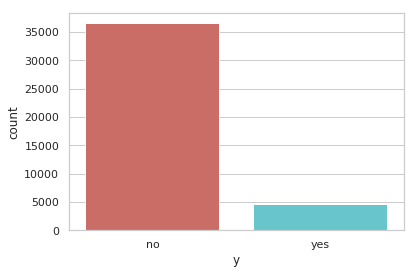

Percentage of subscription: 11.265417111780131
Percentage of no subscription: 88.73458288821988


<Figure size 432x288 with 0 Axes>

In [13]:
# Verileri keşfedelim
# Bankanın aldığı olumlu ve olumsuz sonuçlara bakalım
data['y'].value_counts()
sns.countplot(x='y', data=data, palette='hls')
plt.show()
plt.savefig('count plot')

# Yüzde olarak olumlu ve olumsuz sonuçlara bakalım
no_subs_count = len(data[data['y']=='no'])
yes_subs_count = len(data[data['y']=='yes'])
no_subs_percentage = no_subs_count / (no_subs_count + yes_subs_count) * 100
yes_subs_percentage = yes_subs_count / (no_subs_count + yes_subs_count) * 100
print('Percentage of subscription:', yes_subs_percentage)
print('Percentage of no subscription:', no_subs_percentage)

# Sınıfların dengesiz olduğu görülüyor. 89:11 oran var.

In [14]:
# Ortalamalara bakalım
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [15]:
# Sonuçlara göre ortalamalara baktığımızda şu gözlemler yapılabilir:
# Olumlu ve ya olumsuz cevap alınan müşterilerin yaş ortalaması büyük bir farklılık göstermiyor, fakat olumlu cevap
# veren müşterilerin yaş ortalaması daha yüksek
# Olumsuz cevap veren müşterilerin çağrıları kısa tutma eğiliminde olduğu görülüyor
# Olumsuz cevap veren müşteriler için aynı kampanya içerisinde daha fazla temas kurulmuş görülüyor. Fikirlerinin
# değiştirilmeye çalışıldığı yorumunu yapabiliriz
# Müşteriler ile kurulan temaslar arasında geçen süreye baktığımızda olumsuz görüşe sahip müşteriler ile daha fazla
# temas kurulmasına rağmen temaslar arasında geçen sürenin daha uzun olduğu görülüyor. Sonuç olarak olumsuz
# görüşe sahip müşteriler daha aralıklı temasa geçildiği, fikirlerini değiştirmeleri için zaman tanındığı söylenebilir
# Olumlu cevap veren müşterilerle, olumsuz cevap veren müşterilere göre geçmişte çok daha fazla temasa geçildiği
# görülüyor. Buradan müşterilerin teklifleri değerlendirmeye ikna edildiği gözlemi çıkartılabilir
 

In [16]:
# Müşterilerin çalıştığı işlere göre ortalamalar:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086


In [17]:
# Müşterilerin medeni hallerine göre ortalamalar:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313037,5157.393750


In [18]:
# Müşterilerin eğitim seviyelerine göre ortalamalar:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509


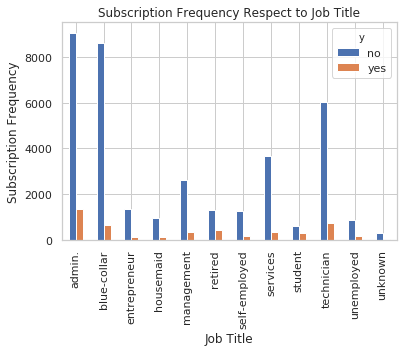

In [19]:
# Verilerin görselleştirilmesi
%matplotlib inline
pd.crosstab(data.job, data.y).plot(kind='bar')
plt.title('Subscription Frequency Respect to Job Title')
plt.xlabel('Job Title')
plt.ylabel('Subscription Frequency')
plt.savefig('subscription_for_jobs')

In [20]:
# Vadeli hesap açma frekansının meslek grubuna önemli bir şekilde bağlı olduğu görülüyor
# Dolayısıyla lojistik regresyon modeli için iyi bir kestirici olabilir

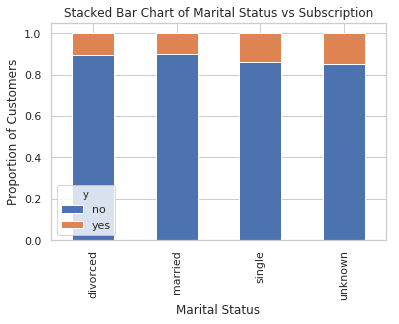

In [21]:
table=pd.crosstab(data.marital, data.y)
table.div(table.sum(axis=1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Subscription')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('marital_vs_subscription')

In [22]:
# Medeni hal iyi bir kestirici gibi gözükmüyor

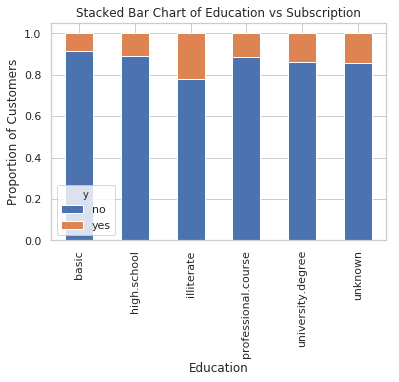

In [23]:
table = pd.crosstab(data.education, data.y)
table.div(table.sum(axis=1), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Subscription')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('education_vs_subscription')

In [24]:
# Eğitim durumu model için iyi bir kestirici olarak gözüküyor

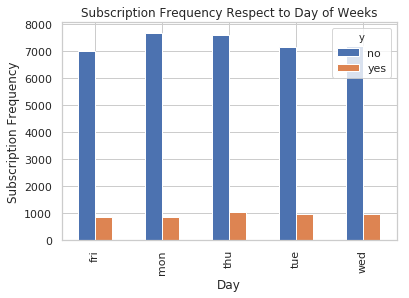

In [25]:
pd.crosstab(data.day_of_week, data.y).plot(kind='bar')
plt.title('Subscription Frequency Respect to Day of Weeks')
plt.xlabel('Day')
plt.ylabel('Subscription Frequency')
plt.savefig('subscription_for_days')

In [26]:
# Temas kurulan günler iyi bir kestirici olmayabilir

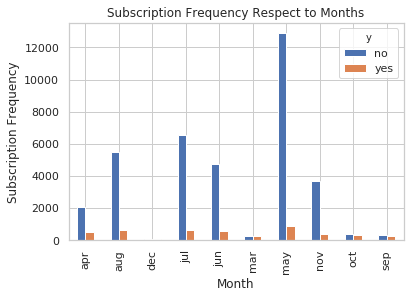

In [27]:
pd.crosstab(data.month, data.y).plot(kind='bar')
plt.title('Subscription Frequency Respect to Months')
plt.xlabel('Month')
plt.ylabel('Subscription Frequency')
plt.savefig('subscription_for_months')

In [28]:
# Aylar iyi bir kestirici gibi duruyor

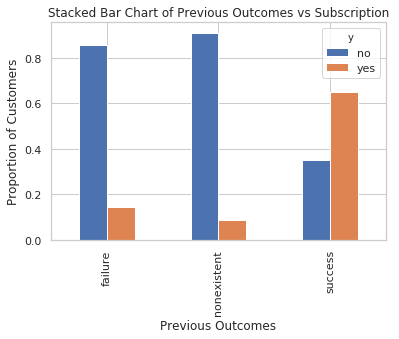

In [29]:
table = pd.crosstab(data.poutcome, data.y)
table.div(table.sum(axis=1), 0).plot(kind='bar')
plt.title('Stacked Bar Chart of Previous Outcomes vs Subscription')
plt.xlabel('Previous Outcomes')
plt.ylabel('Proportion of Customers')
plt.savefig('poutcomes_vs_subscription')

In [30]:
# Önceki sonuçlar da iyi bir kestirici gibi duruyor

In [31]:
columns_to_dummy = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
           'month', 'day_of_week', 'poutcome']

for column in columns_to_dummy:
    dummy = pd.get_dummies(data[column], prefix=column, drop_first=True)
    data  = data.join(dummy)

#final_data = final_data.join(data['y'])

new_columns   = data.columns.values.tolist()
final_columns = [column for column in new_columns if column not in columns_to_dummy]
final_data    = data[final_columns]

final_data['y'] = np.where(final_data['y'] == 'yes', 1, 0)
print(final_data.columns)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')


In [47]:
# Oluşturulan eğitim veri kümesi üzerinde SMOTE algoritması ile yukarı örnekleme yapılır.
# Kabaca SMOTE şu işe yarar:
# 1) Küçük sınıftan kopyalama yapmadan sentetik örnekler oluşturur
# 2) Rastgele K-yakın komşu seçer ve benzer fakat rastgele kırpılmış yeni örnekler oluşturur

from imblearn.over_sampling import SMOTE

x = final_data.loc[:, final_data.columns != 'y']
y = final_data.loc[:, final_data.columns == 'y']

smote = SMOTE(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
columns = x_train.columns

smote_data_x,smote_data_y = smote.fit_sample(x_train, y_train)
smote_data_x = pd.DataFrame(data=smote_data_x, columns=columns)
smote_data_y = pd.DataFrame(data=smote_data_y, columns=['y'])

print('length of data before oversampling: ', len(x_train))
print('Length of oversampled data: ', len(smote_data_y))
print('Length of no subscriptions in oversampled data: ', len(smote_data_y[smote_data_y['y'] == 0]))
print('Length of subscriptions in oversampled data: ', len(smote_data_y[smote_data_y['y'] == 1]))

length of data before oversampling:  28831
Length of oversampled data:  51158
Length of no subscriptions in oversampled data:  25579
Length of subscriptions in oversampled data:  25579


In [48]:
# Recursive Feature Eliminating tekniği ile öznitelikler elenerek mümkün olduğunca küçük bir alt küme
# seçilmeye çalışılır. Tekrarlı şekilde model kurularak en iyi ve ya en kötü öznitelik bir kenara ayrılır
# Süreç, öznitelik kalmayana dek geriye kalan öznitelikler üzerinden devam ettirilir

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()
rfe = RFE(regressor, 20)
rfe = rfe.fit(smote_data_x, smote_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False  True False False  True False False False
 False  True  True False False  True False False False False False  True
 False False False  True  True  True False  True False  True False False
 False  True  True False  True  True  True False  True  True False False
 False  True  True]
[27 26 14 31 24  1 13 22  1 21  5 28 10  1  1  9  4  1 11 20 29  3  2  1
 23 12 30  1  1  1 32  1 17  1 15 16 19  1  1 18  1  1  1 25  1  1  8  7
  6  1  1]


In [49]:
# RFE'ye göre özniteliklerimizi seçelim
selected_features = smote_data_x.columns.values[rfe.support_]

# Modelimiz için girdileri ve hedef değerleri belirleyelim
training_x = smote_data_x[selected_features]
training_y = smote_data_y['y']

In [50]:
# Öznitelikleri değerlendirelim
import statsmodels.api as sm

def evaluate_features(y, x):
    logit_model = sm.Logit(y, x)
    result = logit_model.fit(method='powell')
    print(result.summary2())
    
evaluate_features(training_y, training_x)

Optimization terminated successfully.
         Current function value: 0.546035
         Iterations: 7
         Function evaluations: 1495
                                      Results: Logit
Model:                        Logit                    Pseudo R-squared:         0.212     
Dependent Variable:           y                        AIC:                      55906.1320
Date:                         2019-06-20 13:20         BIC:                      56074.1428
No. Observations:             51158                    Log-Likelihood:           -27934.   
Df Model:                     18                       LL-Null:                  -35460.   
Df Residuals:                 51139                    LLR p-value:              0.0000    
Converged:                    1.0000                   Scale:                    1.0000    
No. Iterations:               7.0000                                                       
------------------------------------------------------------------------

In [51]:
# P-value değerleri %5'ten büyük olan değişkenleri siliyoruz
to_remove = ['marital_unknown', 'housing_unknown', 'loan_unknown']
new_features = [feature for feature in training_x.columns if feature not in to_remove]
training_x = training_x[new_features]

In [52]:
# Sonuçları tekrar kontrol edelim
evaluate_features(training_y, training_x)

Optimization terminated successfully.
         Current function value: 0.546182
         Iterations: 7
         Function evaluations: 1266
                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.212     
Dependent Variable:      y                   AIC:                 55917.1398
Date:                    2019-06-20 13:21    BIC:                 56067.4653
No. Observations:        51158               Log-Likelihood:      -27942.   
Df Model:                16                  LL-Null:             -35460.   
Df Residuals:            51141               LLR p-value:         0.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          7.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------

In [58]:
# Modeli kuralım
X_train, X_test, y_train, y_test = train_test_split(training_x, training_y,
                                                    test_size=0.3, random_state=0)

regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
# Test kümesi üzerinden modelimizi değerlendirelim
predictions = regressor.predict(X_test)
print('Accuracy on test set: ', regressor.score(X_test, y_test))

Accuracy on test set:  0.7380766223612197


In [65]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, predictions)

print('True Positive: ', confusion[0][0], 'False Negative: ', confusion[0][1])
print('False Positive: ', confusion[0][1], 'True Negative: ', confusion[1][1])

True Positive:  6237 False Negative:  1414
False Positive:  1414 True Negative:  5091


In [66]:
# Precision, recall, F-measure ve support
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76      7651
           1       0.78      0.66      0.72      7697

   micro avg       0.74      0.74      0.74     15348
   macro avg       0.74      0.74      0.74     15348
weighted avg       0.74      0.74      0.74     15348



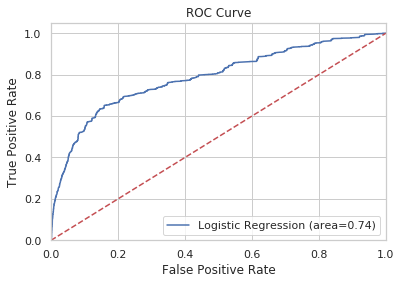

In [68]:
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, regressor.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('ROC-Curve')
plt.show()